In [2]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import astropy.coordinates as coord
import astropy.units as u
from pixell import enmap, enplot, utils
import matplotlib as mpl
import healpy as hp
from astropy import wcs

[1724017324.925616] [kingcrab:293210:0]        ib_iface.c:1035 UCX  ERROR ibv_create_cq(cqe=4096) failed: Cannot allocate memory


[kingcrab:293210] pml_ucx.c:309  Error: Failed to create UCP worker


In [3]:
def blend(fg_file,bg_file,alpha,save_file=None,verbose=True):
    from PIL import Image
    foreground = Image.open(fg_file) #.convert('RGB')
    background = Image.open(bg_file)
    print(foreground.size, background.size)
    print(foreground.mode)
    print(background.mode)
    blended = Image.blend(foreground, background, alpha=alpha)
    if save_file is not None:
        blended.save(save_file)
        if verbose: cprint("Saved blended image to "+ save_file,color="g")
    return blended

## DESI

In [21]:
desi_full = fits.open("/mnt/raid-cita/mlokken/data/desi/LRG_clustering.dat.fits")
desilrg = desi_full[1].data
desi_full.close()

In [22]:
zlim = (desilrg["Z"]>0.5)&(desilrg["Z"]<0.51)
desilrg = desilrg[zlim]

In [23]:
desi_red = fits.open("/mnt/raid-cita/mlokken/data/desi/small_region_LRG_clustering.dat.fits")
desi_lrg_red = desi_red[1].data
desi_red.close()

In [24]:
zlim = (desi_lrg_red["Z"]>0.5)&(desi_lrg_red["Z"]<0.51)
desi_lrg_red = desi_lrg_red[zlim]

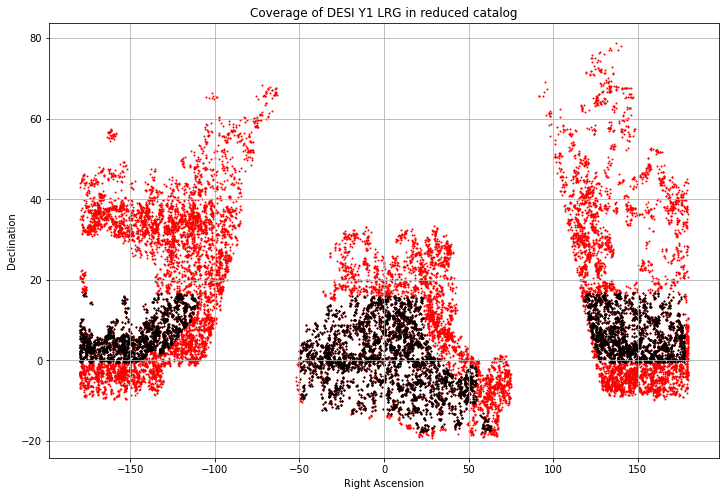

In [29]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
ra = coord.Angle(desi_lrg_red['RA']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(desi_lrg_red['Dec']*u.degree)
ax = plt.subplot()

rafull = coord.Angle(desilrg['RA']*u.degree)
rafull = rafull.wrap_at(180*u.degree)

decfull = coord.Angle(desilrg['Dec']*u.degree)
ax.scatter(rafull, decfull, s=1, color='r')
ax.scatter(ra, dec, s=1, color='k')
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_title("Coverage of DESI Y1 LRG in reduced catalog")
ax.grid()
# plt.xticks([45,30,15,0,-15])
# plt.yticks([-10,-5,0,5])

## DES

In [10]:
des_full = fits.open("/mnt/raid-cita/mlokken/data/cluster_cats/redmapper2.2.1_lgt20vl50_mask_actshr1deg_des_cutpt8.fit")
desclustrs = des_full[1].data
des_full.close()

In [11]:
zlim = (desclustrs["Z"]>0.1)&(desclustrs["Z"]<0.95)
lambda_lim = desclustrs["LAMBDA_CHISQ"]>20
desclustrs = desclustrs[lambda_lim]

In [6]:
# smaller version
# des = fits.open("/mnt/raid-cita/mlokken/data/cluster_cats/paper1/small_region_y3_gold_2.2.1_wide_sofcol_run2_redmapper_v6.4.22+2_lgt5_vl50_catalog.fit")
# desclustrs = des[1].data
# des.close()

In [8]:
ra  = desclustrs["RA"]
dec = desclustrs["Dec"]

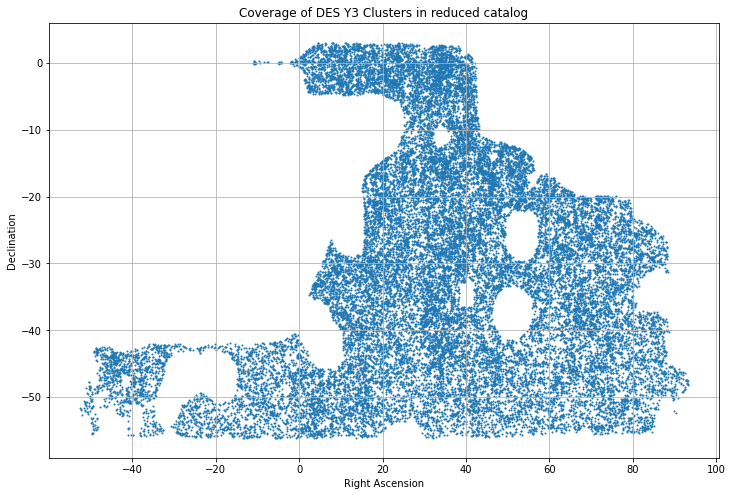

In [8]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
ra = coord.Angle(ra*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(dec*u.degree)
ax2 = plt.subplot()
ax2.scatter(ra, dec, s=1)
# ax2.set_xlim([55,-25])
# ax2.set_ylim([-11,6])
ax2.set_xlabel("Right Ascension")
ax2.set_ylabel("Declination")
ax2.set_title("Coverage of DES Y3 Clusters in reduced catalog")
ax2.grid()
# plt.xticks([45,30,15,0,-15])
# plt.yticks([-10,-5,0,5])

In [9]:
# redmagic
# redmagic = fits.open("/mnt/raid-cita/mlokken/data/redmagic/y3_gold_2.2.1_wide_sofcol+deep_mof_run_redmagic_highdens.fit")
# desgals  = redmagic[1].data
# redmagic.close()
# ra_gal = desgals["RA"]
# dec_gal = desgals["Dec"]

In [10]:
# maglim
maglim = fits.open("/mnt/raid-cita/mlokken/data/maglim/maglim_data_wflux_wmag.fits")
desgals  = maglim[1].data
maglim.close()
ra_gal = desgals["RA"]
dec_gal = desgals["Dec"]

In [11]:
idx = np.random.choice(np.arange(len(ra_gal)),size=20000)
ra_gal  = ra_gal[idx]
dec_gal = dec_gal[idx]

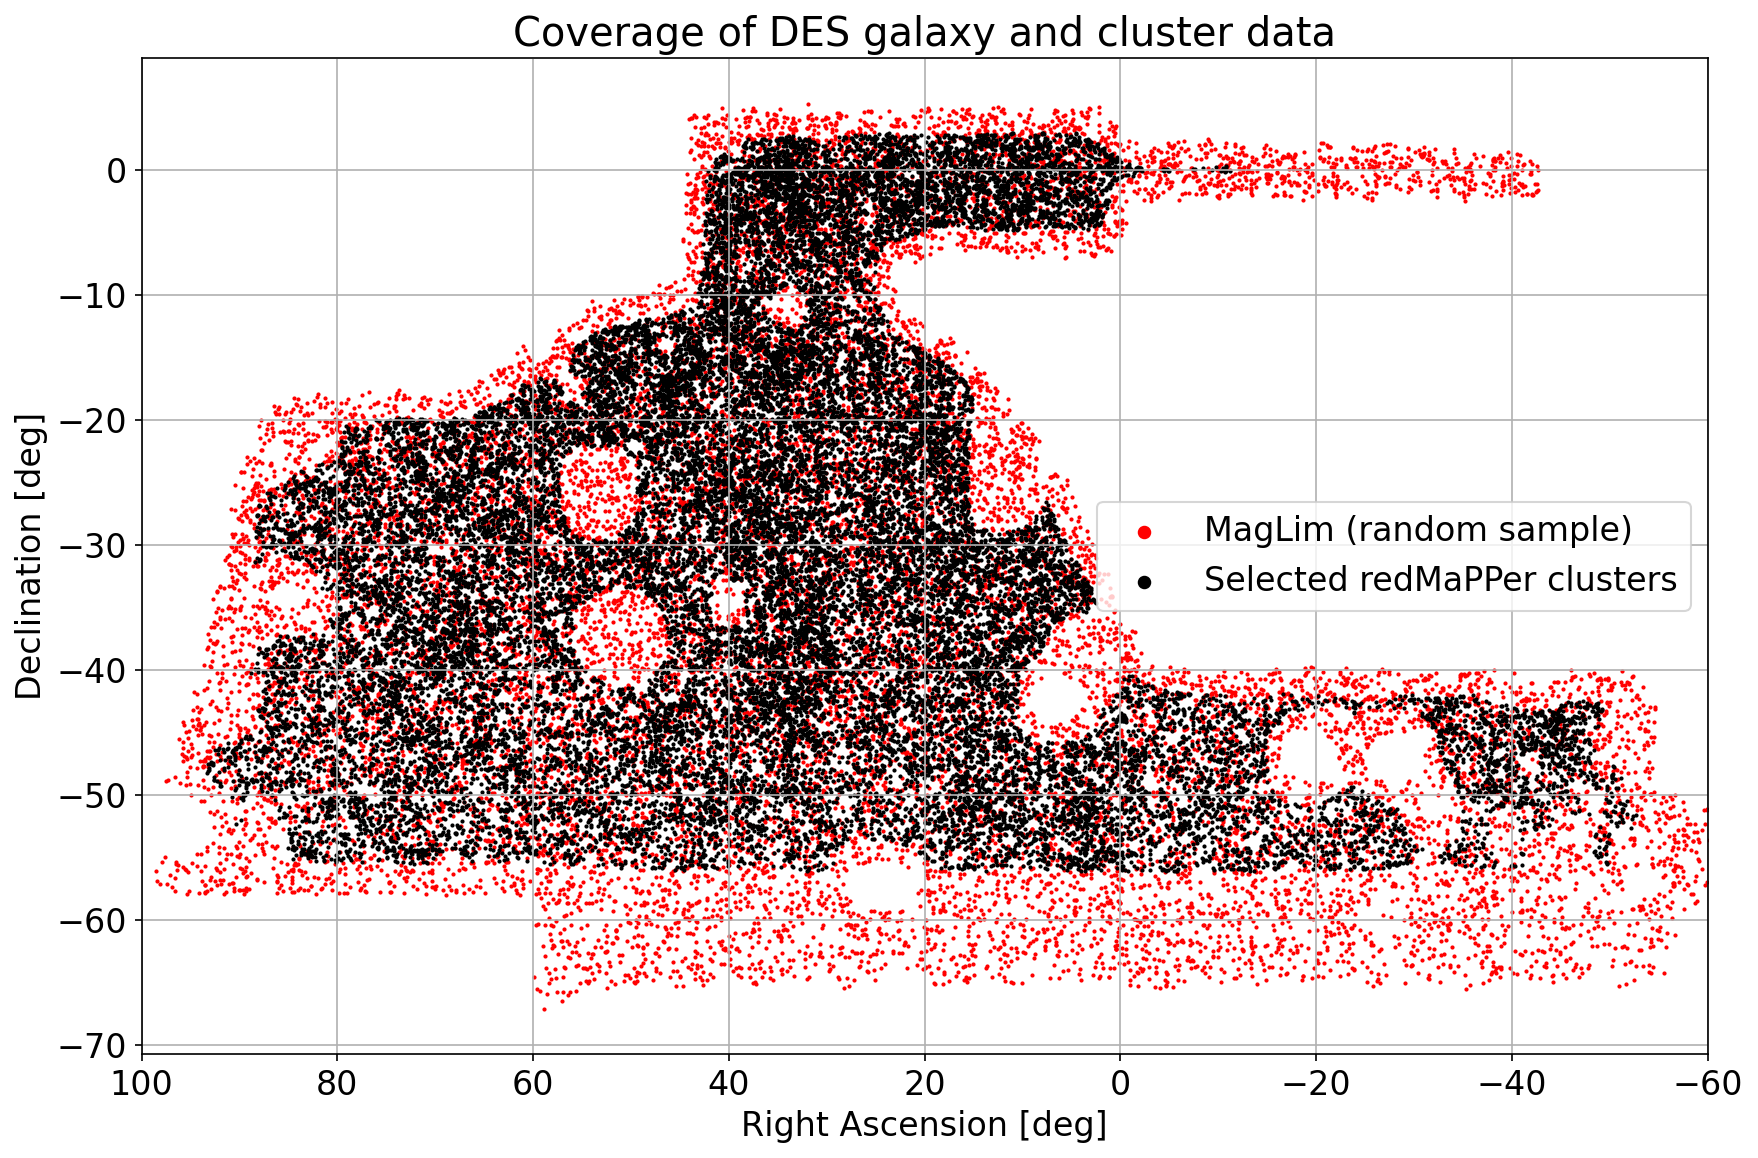

In [26]:
mpl.rcParams['figure.figsize'] = [12,8]
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['font.size']=16
ax2 = plt.subplot()
ra_gal_u = coord.Angle(ra_gal*u.degree)
ra_gal_u = ra_gal_u.wrap_at(180*u.degree)
dec_gal_u = coord.Angle(dec_gal*u.degree)
ax2.scatter(ra_gal_u, dec_gal_u, s=1, color='r', label='MagLim (random sample)')
ax2.scatter(ra, dec, s=1, color='k', label='Selected redMaPPer clusters')

# ax2.set_xlim([45.44583333, -11])
# ax2.set_ylim( [ -11.42916667,   5.9375])
ax2.set_xlabel("Right Ascension [deg]")
ax2.set_ylabel("Declination [deg]")
ax2.set_title("Coverage of DES galaxy and cluster data")
ax2.grid()
# plt.xticks([45,30,15,0])
# plt.yticks([-10,-5,0,5])
leg = ax2.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [30]
plt.xlim([100,-60])
plt.tight_layout()
plt.savefig("/home/mlokken/oriented_stacking/plots/paper2/des_maglim_redmapper_data_full_map.png", dpi=150)

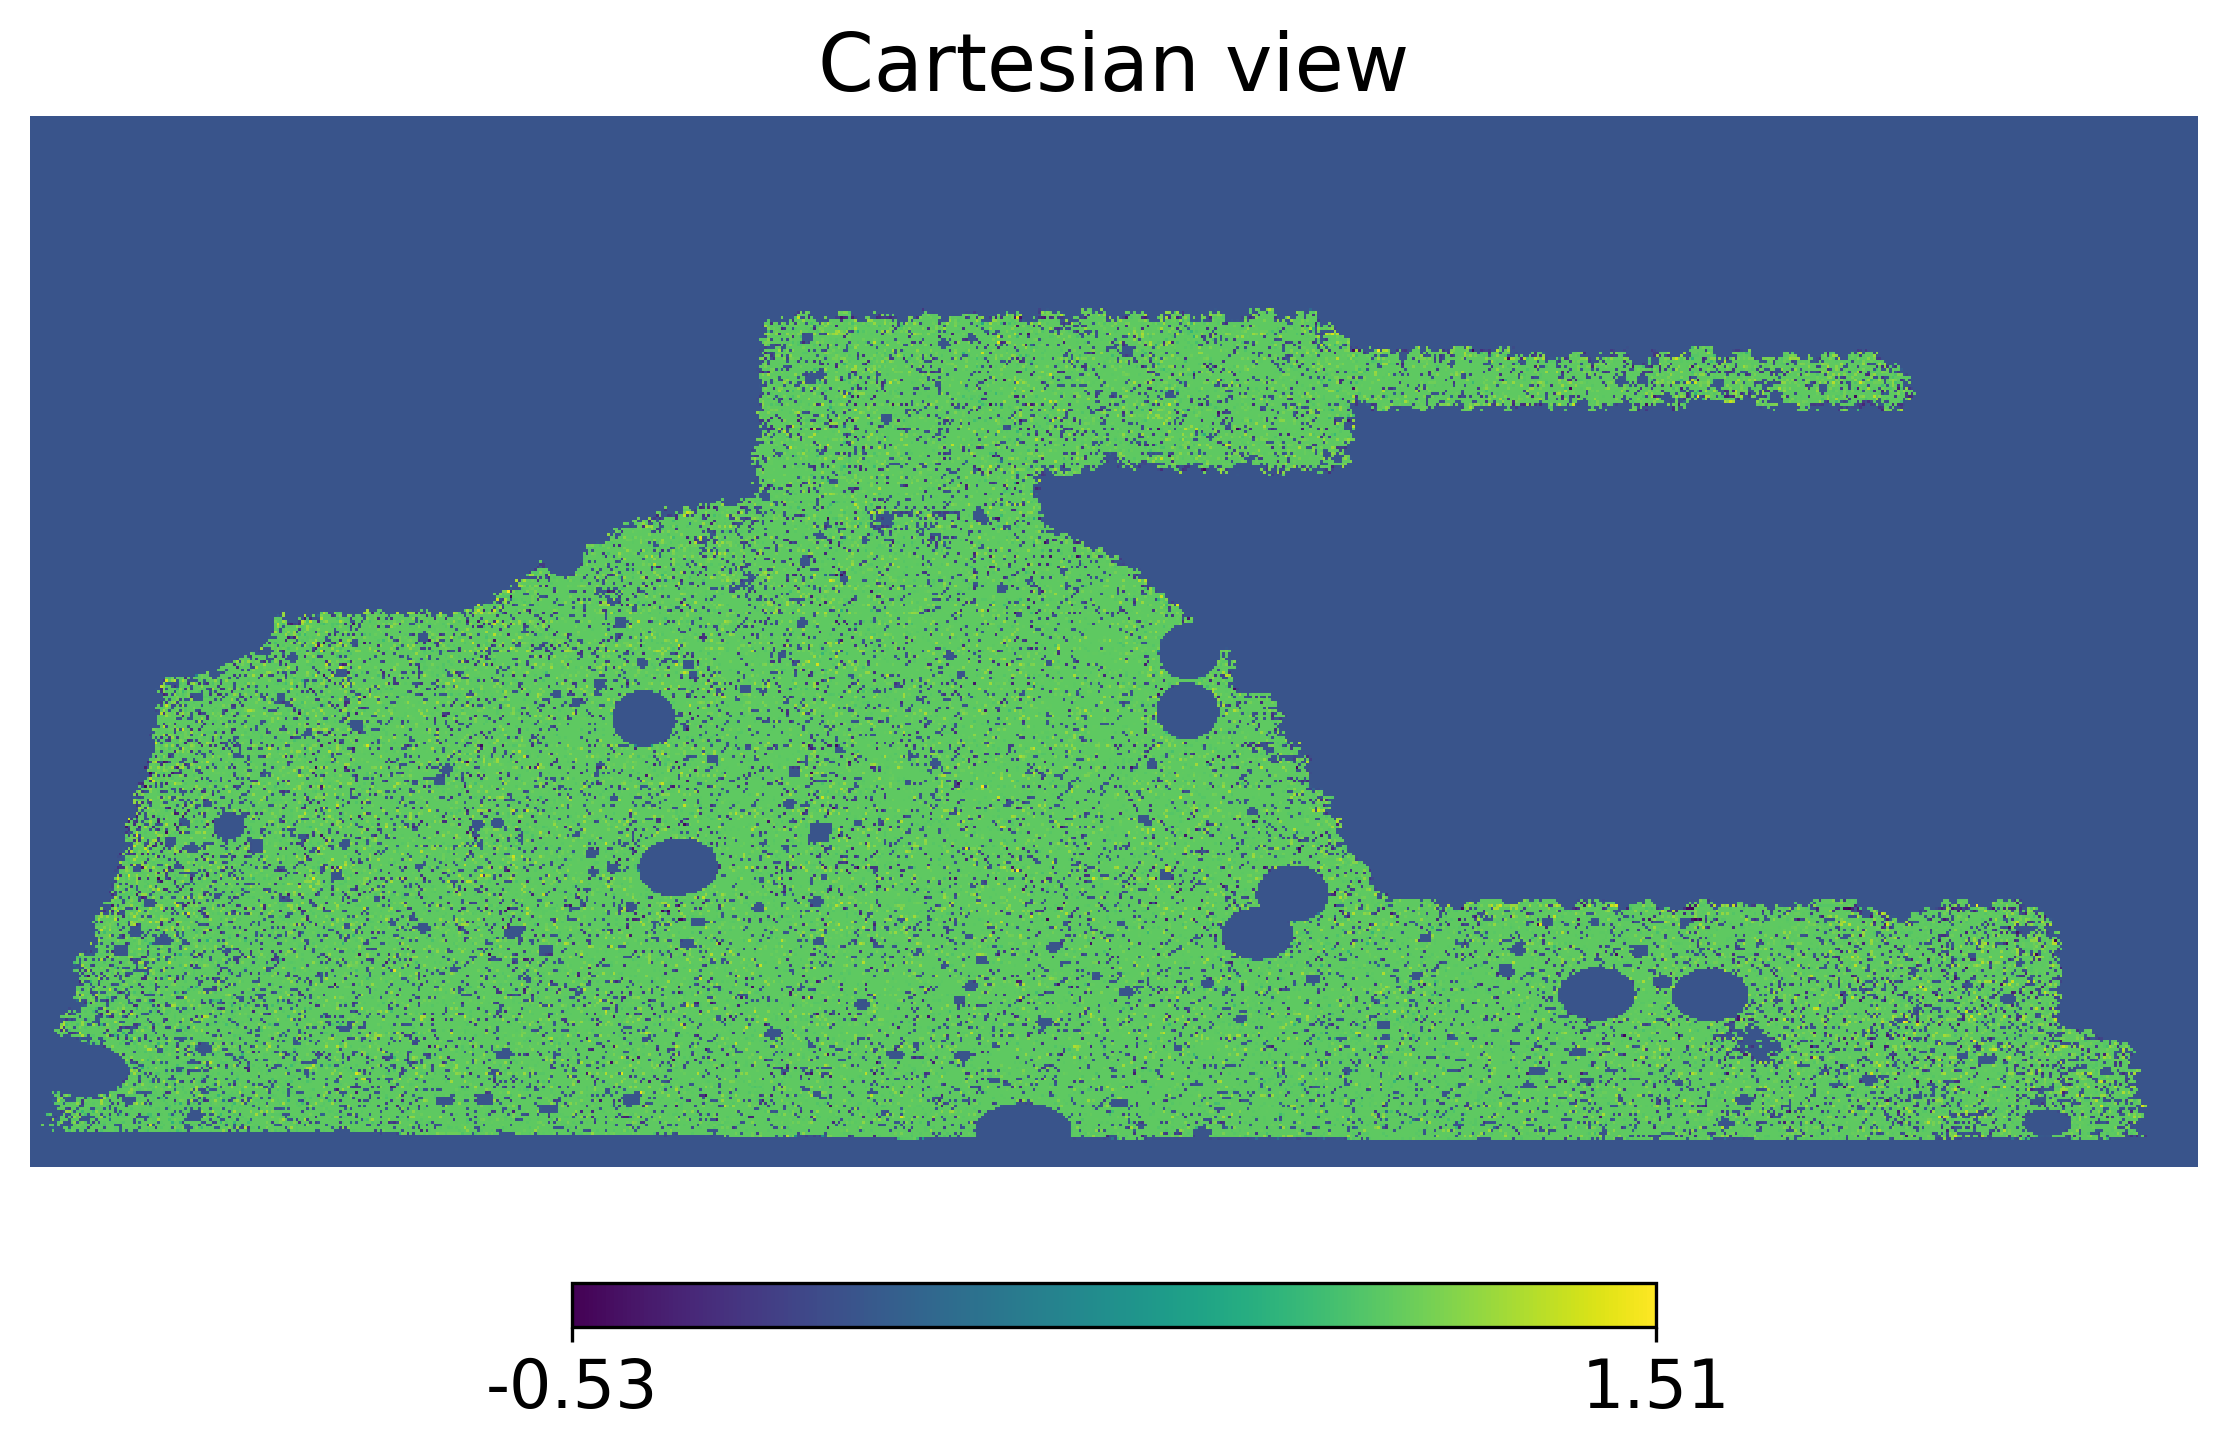

In [15]:
mask = hp.read_map("/mnt/raid-cita/mlokken/data/masks/combined_y3_gold_2.2.1_RING_joint_redmagic_v0.5.1_wide_maglim_v2.2_outputMask_wide_mask_GAL070_apod_1.50_deg_wExtended_shrunk_1deg_4096_hpx.fits")
lonmin,lonmax = -65,100
latmin,latmax = -60,20
flatmask = hp.cartview(mask, lonra=[lonmin,lonmax], latra=[latmin,latmax], return_projected_map=True)

Looking for holes more than 2.15 deg in diameter

[400. 194.]
[ 17.5 -20. ]
[-0.20625     0.20618557]


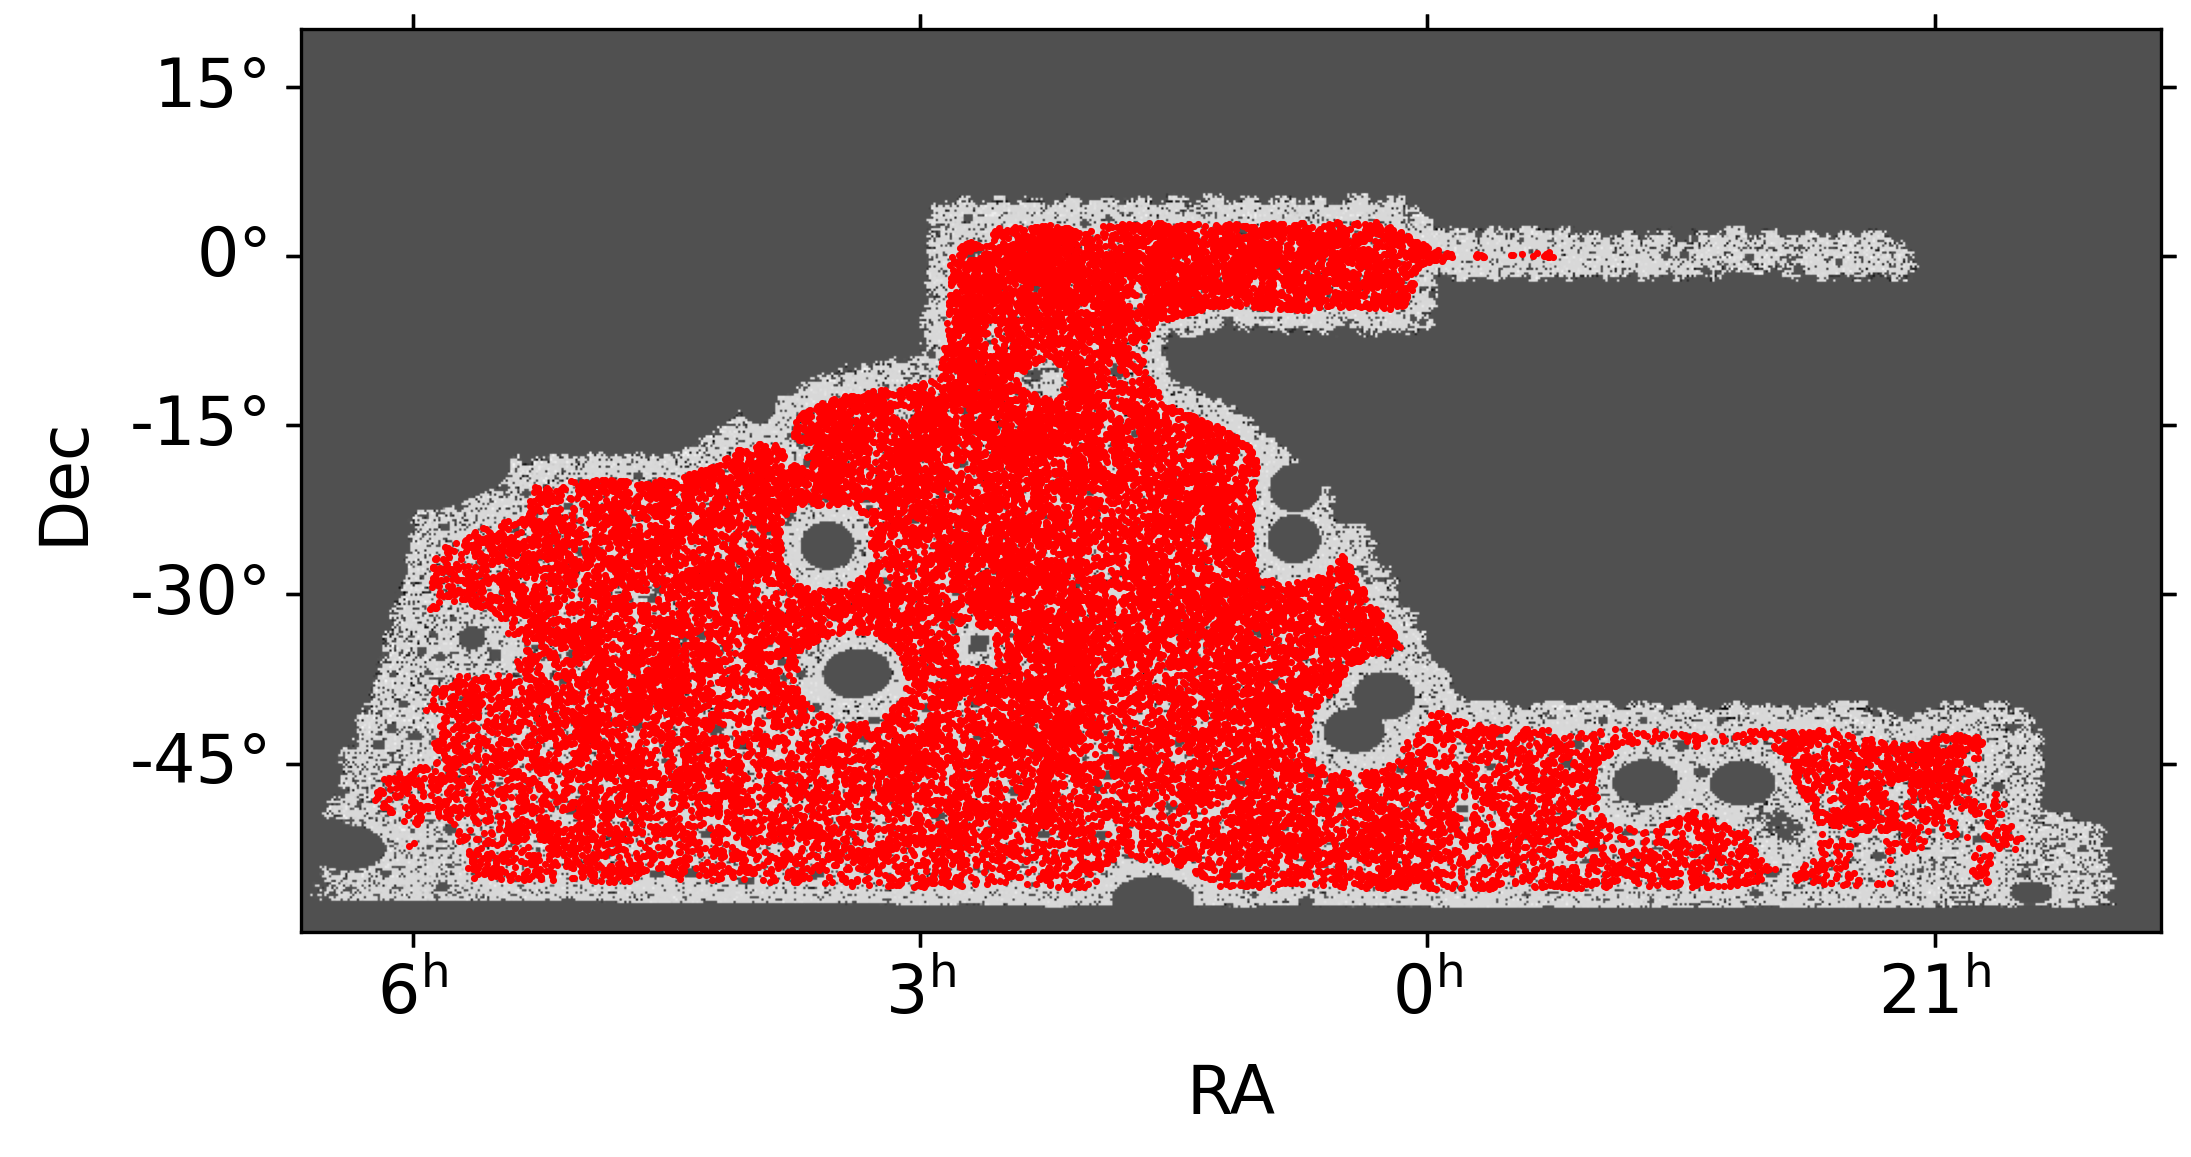

In [17]:
condition = (ra.value>lonmin) & (ra.value < lonmax) & (dec.value>latmin) & (dec.value<latmax)
w = wcs.WCS(naxis=2)
height = float(flatmask.shape[0])
length = float(flatmask.shape[1])
cdeltaX, crvalX = (lonmin-lonmax)/length, (lonmin+lonmax)/2.
cdeltaY, crvalY = (latmax-latmin)/height, (latmin+latmax)/2.
w.wcs.crpix = length/2., height/2.
print(w.wcs.crpix)
w.wcs.crval = [crvalX,crvalY]
print(w.wcs.crval)
w.wcs.cdelt = np.array([cdeltaX,cdeltaY])
print(w.wcs.cdelt)
w.wcs.ctype = ["RA", "DEC"]
Xpix,Ypix = w.all_world2pix(ra.value[condition],dec.value[condition],0)
plt.figure(figsize=[8,8])
nrows = 1
ax1 = plt.subplot(nrows, 1, 1, projection=w)
ax1.imshow(flatmask,  cmap='Greys_r', vmin=-.5)
ax1.scatter(Xpix,Ypix,color='red', s=.5)
ax1.set_xlabel("RA")
ax1.set_ylabel("Dec")
plt.savefig("/home/mlokken/oriented_stacking/plots/paper2/redmapper_on_mask_y3.png", dpi=150)

Conclusion: current masking works, clusters have been removed more than 2 deg from edge. 

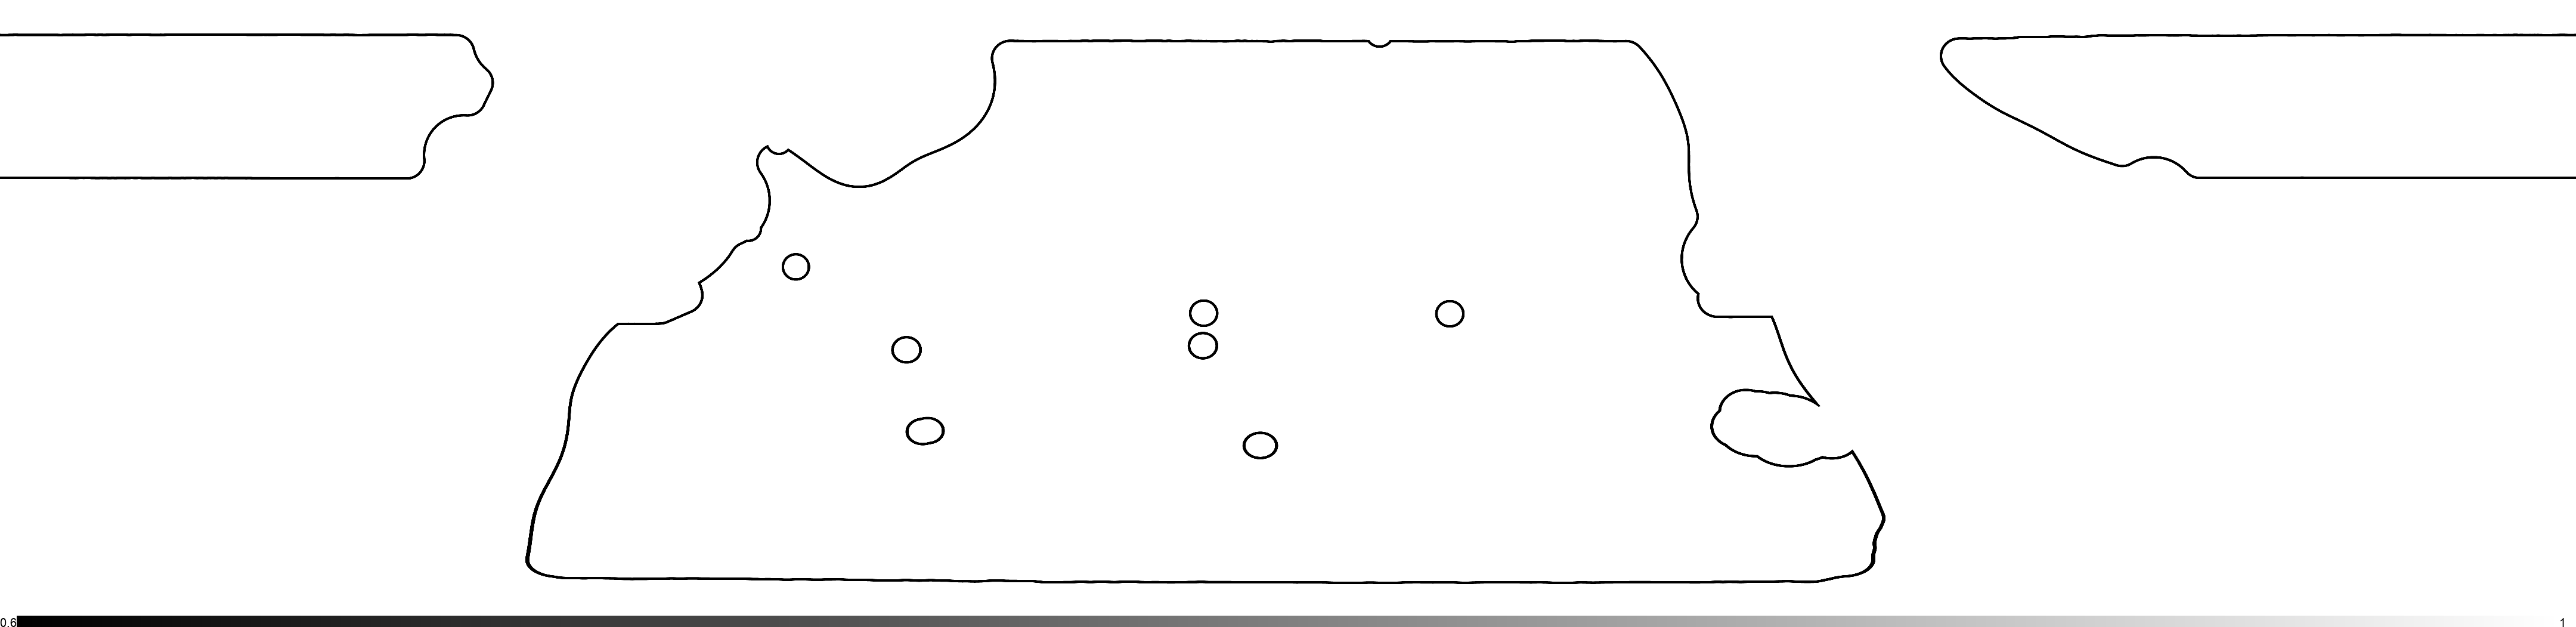

In [28]:
# ymask = enmap.read_map("/mnt/raid-cita/mlokken/data/masks/outputMask_wide_mask_GAL070_apod_1.50_deg_wExtended.fits")
actplot = enplot.plot(np.logical_not((ymask<1.0)&(ymask>0.9)), color='gray', downgrade=10, colorbar=True, grid=False)
enplot.show(actplot)
enplot.write("/home/mlokken/oriented_stacking/plots/paper2/act_ymask_outline", actplot)

Check to see if the clusters encroach on the edges of the slightly-smaller simulated y maps

In [22]:
# sim_map = hp.read_map("/mnt/raid-cita/mlokken/data/act_ymaps/sim_ymaps/wsky_t_nilc_y_220302_masks_20200723_bin_apod_cal_True_dg1_w4.0_h4.0_lsmooth400_lmax10799_set0_0102.fits")
# hp.mollview(sim_map, min=0,max=1e-5)
# # mask = hp.read_map("/mnt/raid-cita/mlokken/data/masks/combined_y3_gold_2.2.1_RING_joint_redmagic_v0.5.1_wide_maglim_v2.2_wide_mask_GAL080_apod_3.00_deg_4096.fits")
# lonmin,lonmax = -30,100
# latmin,latmax = -65,-10
# flatmap = hp.cartview(sim_map, lonra=[lonmin,lonmax], latra=[latmin,latmax], return_projected_map=True)

In [23]:
# condition = (ra.value>lonmin) & (ra.value < lonmax) & (dec.value>latmin) & (dec.value<latmax)
# w = wcs.WCS(naxis=2)
# height = float(flatmap.shape[0])
# length = float(flatmap.shape[1])
# cdeltaX, crvalX = (lonmin-lonmax)/length, (lonmin+lonmax)/2.
# cdeltaY, crvalY = (latmax-latmin)/height, (latmin+latmax)/2.
# w.wcs.crpix = length/2., height/2.
# print(w.wcs.crpix)
# w.wcs.crval = [crvalX,crvalY]
# print(w.wcs.crval)
# w.wcs.cdelt = np.array([cdeltaX,cdeltaY])
# print(w.wcs.cdelt)
# w.wcs.ctype = ["RA", "DEC"]
# Xpix,Ypix = w.all_world2pix(ra.value[condition],dec.value[condition],0)
# plt.figure(figsize=[8,8])
# nrows = 1
# ax1 = plt.subplot(nrows, 1, 1, projection=w)
# ax1.imshow(flatmap, vmin=0, vmax=1e-5)
# ax1.scatter(Xpix,Ypix,color='red', s=.5, alpha=.5)
# ax1.set_xlabel("RA")
# ax1.set_ylabel("Dec")

## Buzzard

In [29]:
buzz = fits.open("/mnt/raid-cita/mlokken/buzzard/catalogs/combined_actdes_mask_pt8_buzzard_1.9.9_3y3a_rsshift_run_redmapper_v0.5.1_lgt05_vl50_catalog.fit")
buzzcls = buzz[1].data
buzzhdr = buzz[1].header
buzz.close()

In [30]:
ra  = buzzcls["RA"]
dec = buzzcls["Dec"]
lam = buzzcls["LAMBDA"]

rich_cond = lam>20
dec = dec[rich_cond]
ra  = ra[rich_cond]

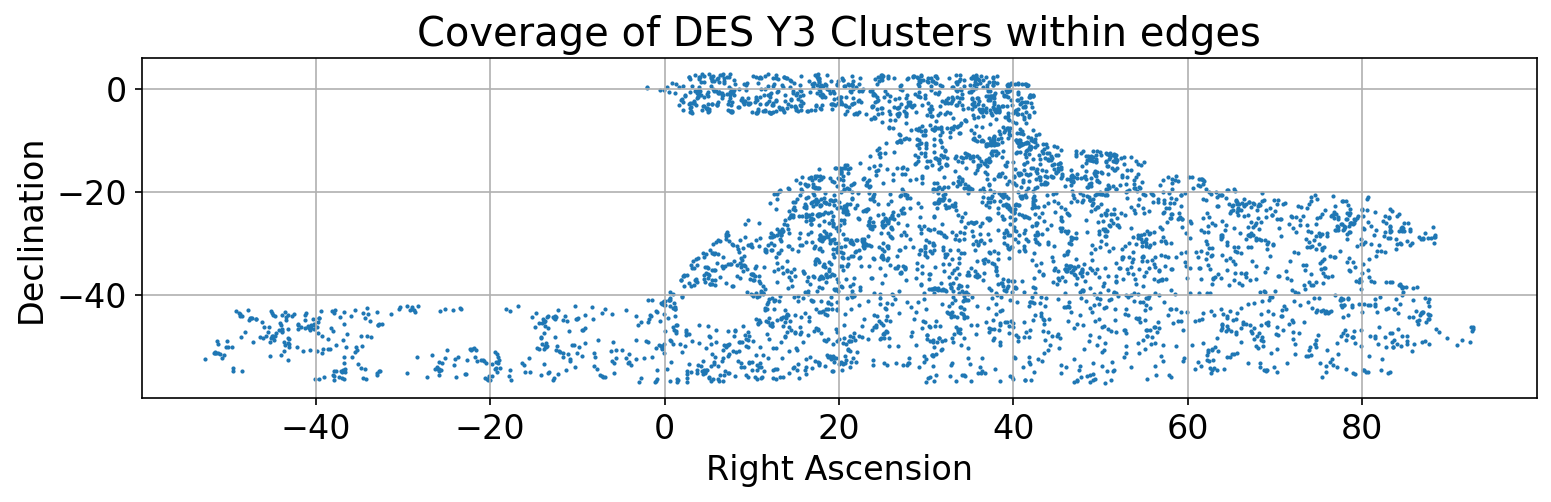

In [31]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 3
ra = coord.Angle(ra*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(dec*u.degree)
ax2 = plt.subplot()
ax2.scatter(ra, dec, s=1)

ax2.set_xlabel("Right Ascension")
ax2.set_ylabel("Declination")
ax2.set_title("Coverage of DES Y3 Clusters within edges")
ax2.grid()


In [37]:
#redmagic = fits.open("/mnt/scratch-lustre/mlokken/buzzard/catalogs/buzzard_1.9.9_3y3a_rsshift_run_redmagic_highdens.fit")
# desgals  = redmagic[1].data
# redmagic.close()
# ra_gal = desgals["RA"]
# dec_gal = desgals["Dec"]

maglim = fits.open("/mnt/raid-cita/mlokken/buzzard/catalogs/maglim_buzz_Ndensity_0.fits")
desgals  = maglim[1].data
maglim.close()
ra_gal = desgals["RA"]
dec_gal = desgals["Dec"]


In [38]:
idx = np.random.choice(np.arange(len(ra_gal)),size=20000)
ra_gal  = ra_gal[idx]
dec_gal = dec_gal[idx]
ra_gal = coord.Angle(ra_gal*u.degree)
ra_gal = ra_gal.wrap_at(180*u.degree)
dec_gal = coord.Angle(dec_gal*u.degree)


In [39]:
len(dec_gal)

20000

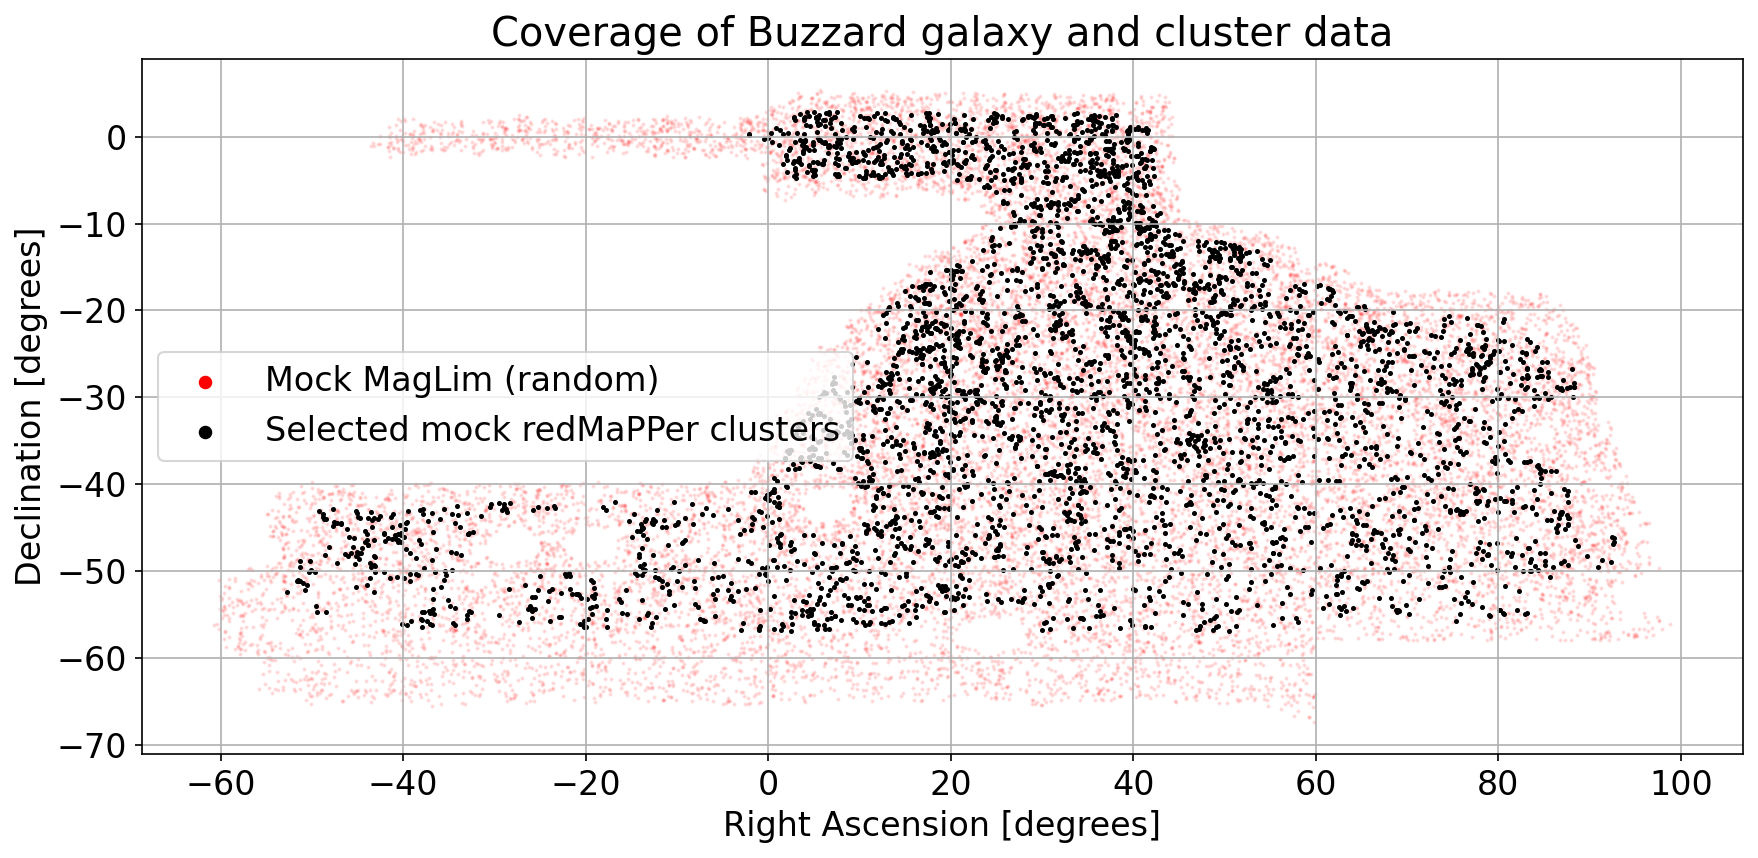

In [40]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 6

ax2 = plt.subplot()

ax2.scatter(ra_gal, dec_gal, s=1, color='r', alpha=0.1, label='Mock MagLim (random)')
ax2.scatter(ra, dec, s=2, color='k', label='Selected mock redMaPPer clusters')


ax2.set_xlabel("Right Ascension [degrees]")
ax2.set_ylabel("Declination [degrees]")
ax2.set_title("Coverage of Buzzard galaxy and cluster data")
ax2.grid()

leg = ax2.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [30]

plt.tight_layout()
# plt.savefig("/home/mlokken/actxdes_stacking/plots/buzz_gal_cl_data_map.png", dpi=300)

In [41]:
ymap = hp.read_map("/mnt/raid-cita/mlokken/buzzard/ymaps/ymap_buzzard_fid_hpx.fits")

[400. 143.]
[  0. -40.]
[-0.35        0.34965035]


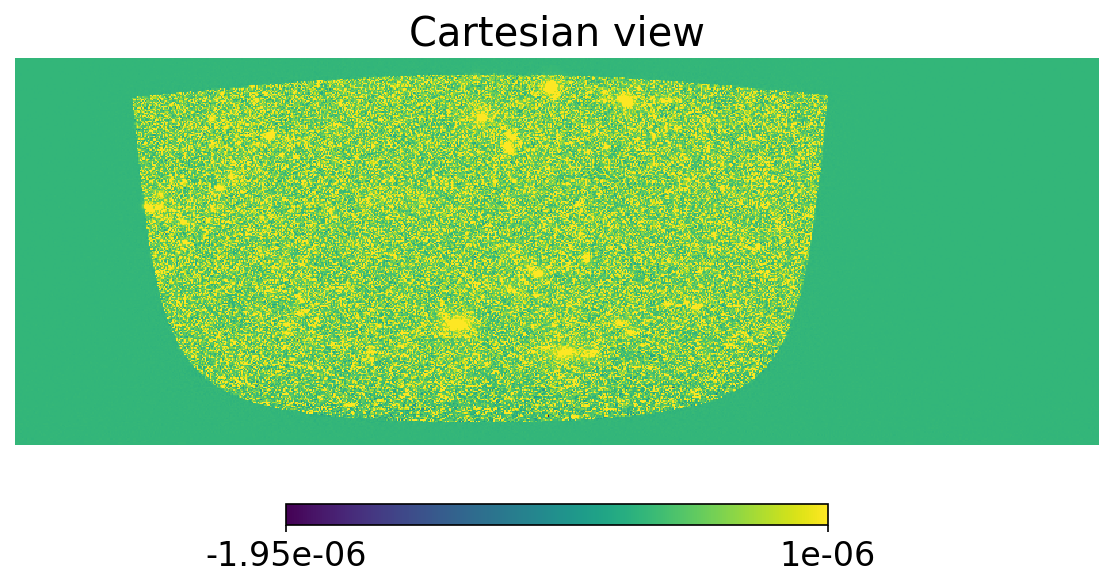

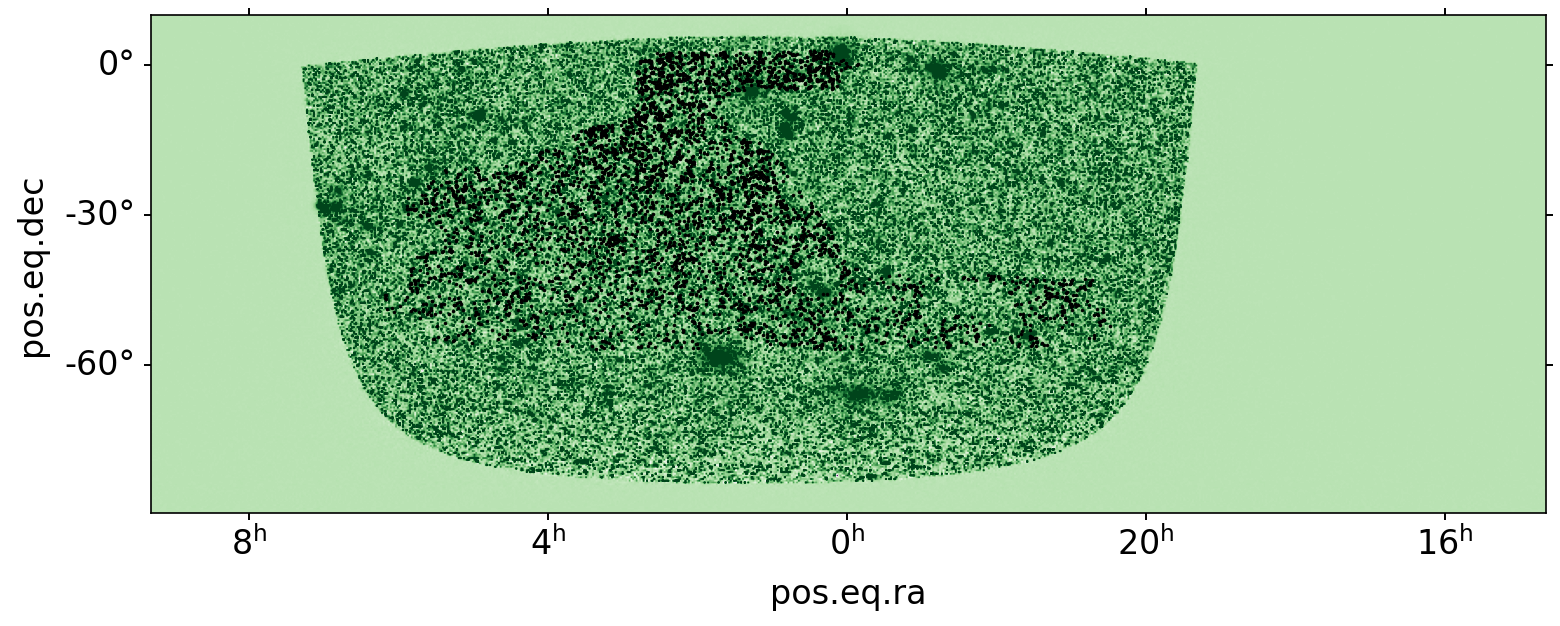

In [42]:

lonmin= -140 
lonmax = 140
latmin = -90
latmax = 10
flatmask = hp.cartview(ymap, lonra=[lonmin,lonmax], latra=[latmin,latmax], return_projected_map=True, max=1e-6)
condition = (ra.value>lonmin) & (ra.value < lonmax) & (dec.value>latmin) & (dec.value<latmax)
w = wcs.WCS(naxis=2)
height = float(flatmask.shape[0])
length = float(flatmask.shape[1])
cdeltaX, crvalX = (lonmin-lonmax)/length, (lonmin+lonmax)/2.
cdeltaY, crvalY = (latmax-latmin)/height, (latmin+latmax)/2.
w.wcs.crpix = length/2., height/2.
print(w.wcs.crpix)
w.wcs.crval = [crvalX,crvalY]
print(w.wcs.crval)
w.wcs.cdelt = np.array([cdeltaX,cdeltaY])
print(w.wcs.cdelt)
w.wcs.ctype = ["RA", "DEC"]
Xpix,Ypix = w.all_world2pix(ra.value[condition],dec.value[condition],0)

plt.figure(figsize=[12,12])
nrows = 1
ax1 = plt.subplot(nrows, 1, 1, projection=w)
ax1.imshow(flatmask, vmax=1e-6, cmap='PRGn')
ax1.scatter(Xpix,Ypix,color='k', s=.5)


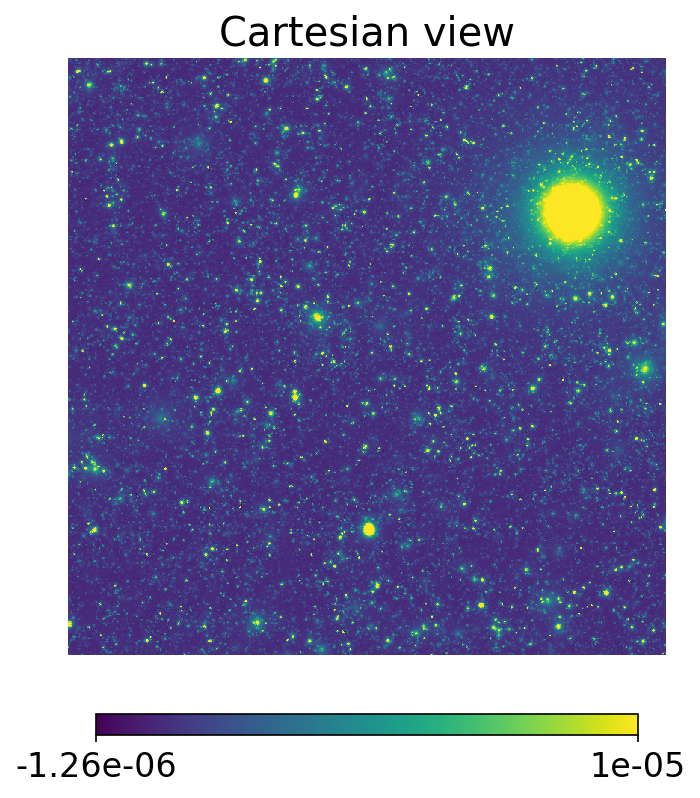

In [45]:
hp.cartview(ymap, max=1e-5, lonra=[0,10], latra=[-5,5])

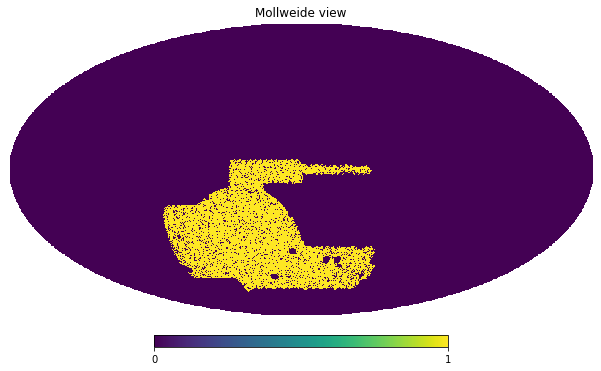

In [17]:
mask = hp.read_map("/mnt/raid-cita/mlokken/data/masks/y3_gold_2.2.1_RING_joint_redmagic_v0.5.1_wide_maglim_v2.2_mask_hpx_4096.fits")
hp.mollview(mask)


[400. 300.]
[20. -5.]
[-0.05  0.05]


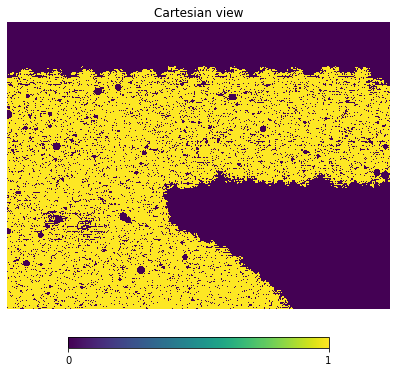

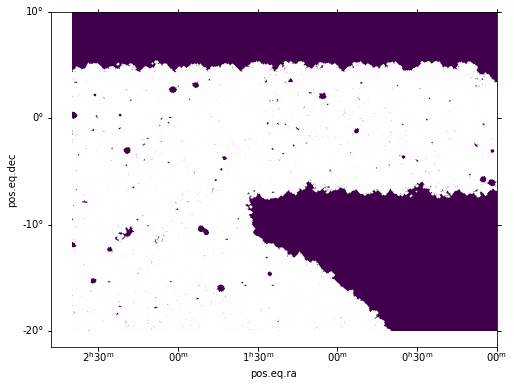

In [21]:
lonmin=0 
lonmax = 40
latmin = -20
latmax = 10
flatmask = hp.cartview(mask, lonra=[lonmin,lonmax], latra=[latmin,latmax], return_projected_map=True)
condition = (ra_gal.value>lonmin) & (ra_gal.value < lonmax) & (dec_gal.value>latmin) & (dec_gal.value<latmax)
w = wcs.WCS(naxis=2)
height = float(flatmask.shape[0])
length = float(flatmask.shape[1])
cdeltaX, crvalX = (lonmin-lonmax)/length, (lonmin+lonmax)/2.
cdeltaY, crvalY = (latmax-latmin)/height, (latmin+latmax)/2.
w.wcs.crpix = length/2., height/2.
print(w.wcs.crpix)
w.wcs.crval = [crvalX,crvalY]
print(w.wcs.crval)
w.wcs.cdelt = np.array([cdeltaX,cdeltaY])
print(w.wcs.cdelt)
w.wcs.ctype = ["RA", "DEC"]
Xpix,Ypix = w.all_world2pix(ra_gal.value[condition],dec_gal.value[condition],0)

plt.figure(figsize=[8,8])
nrows = 1
ax1 = plt.subplot(nrows, 1, 1, projection=w)
ax1.imshow(flatmask, vmax=5, cmap='PRGn')
ax1.scatter(Xpix,Ypix,color='w', s=.5)


# Load in full ymap

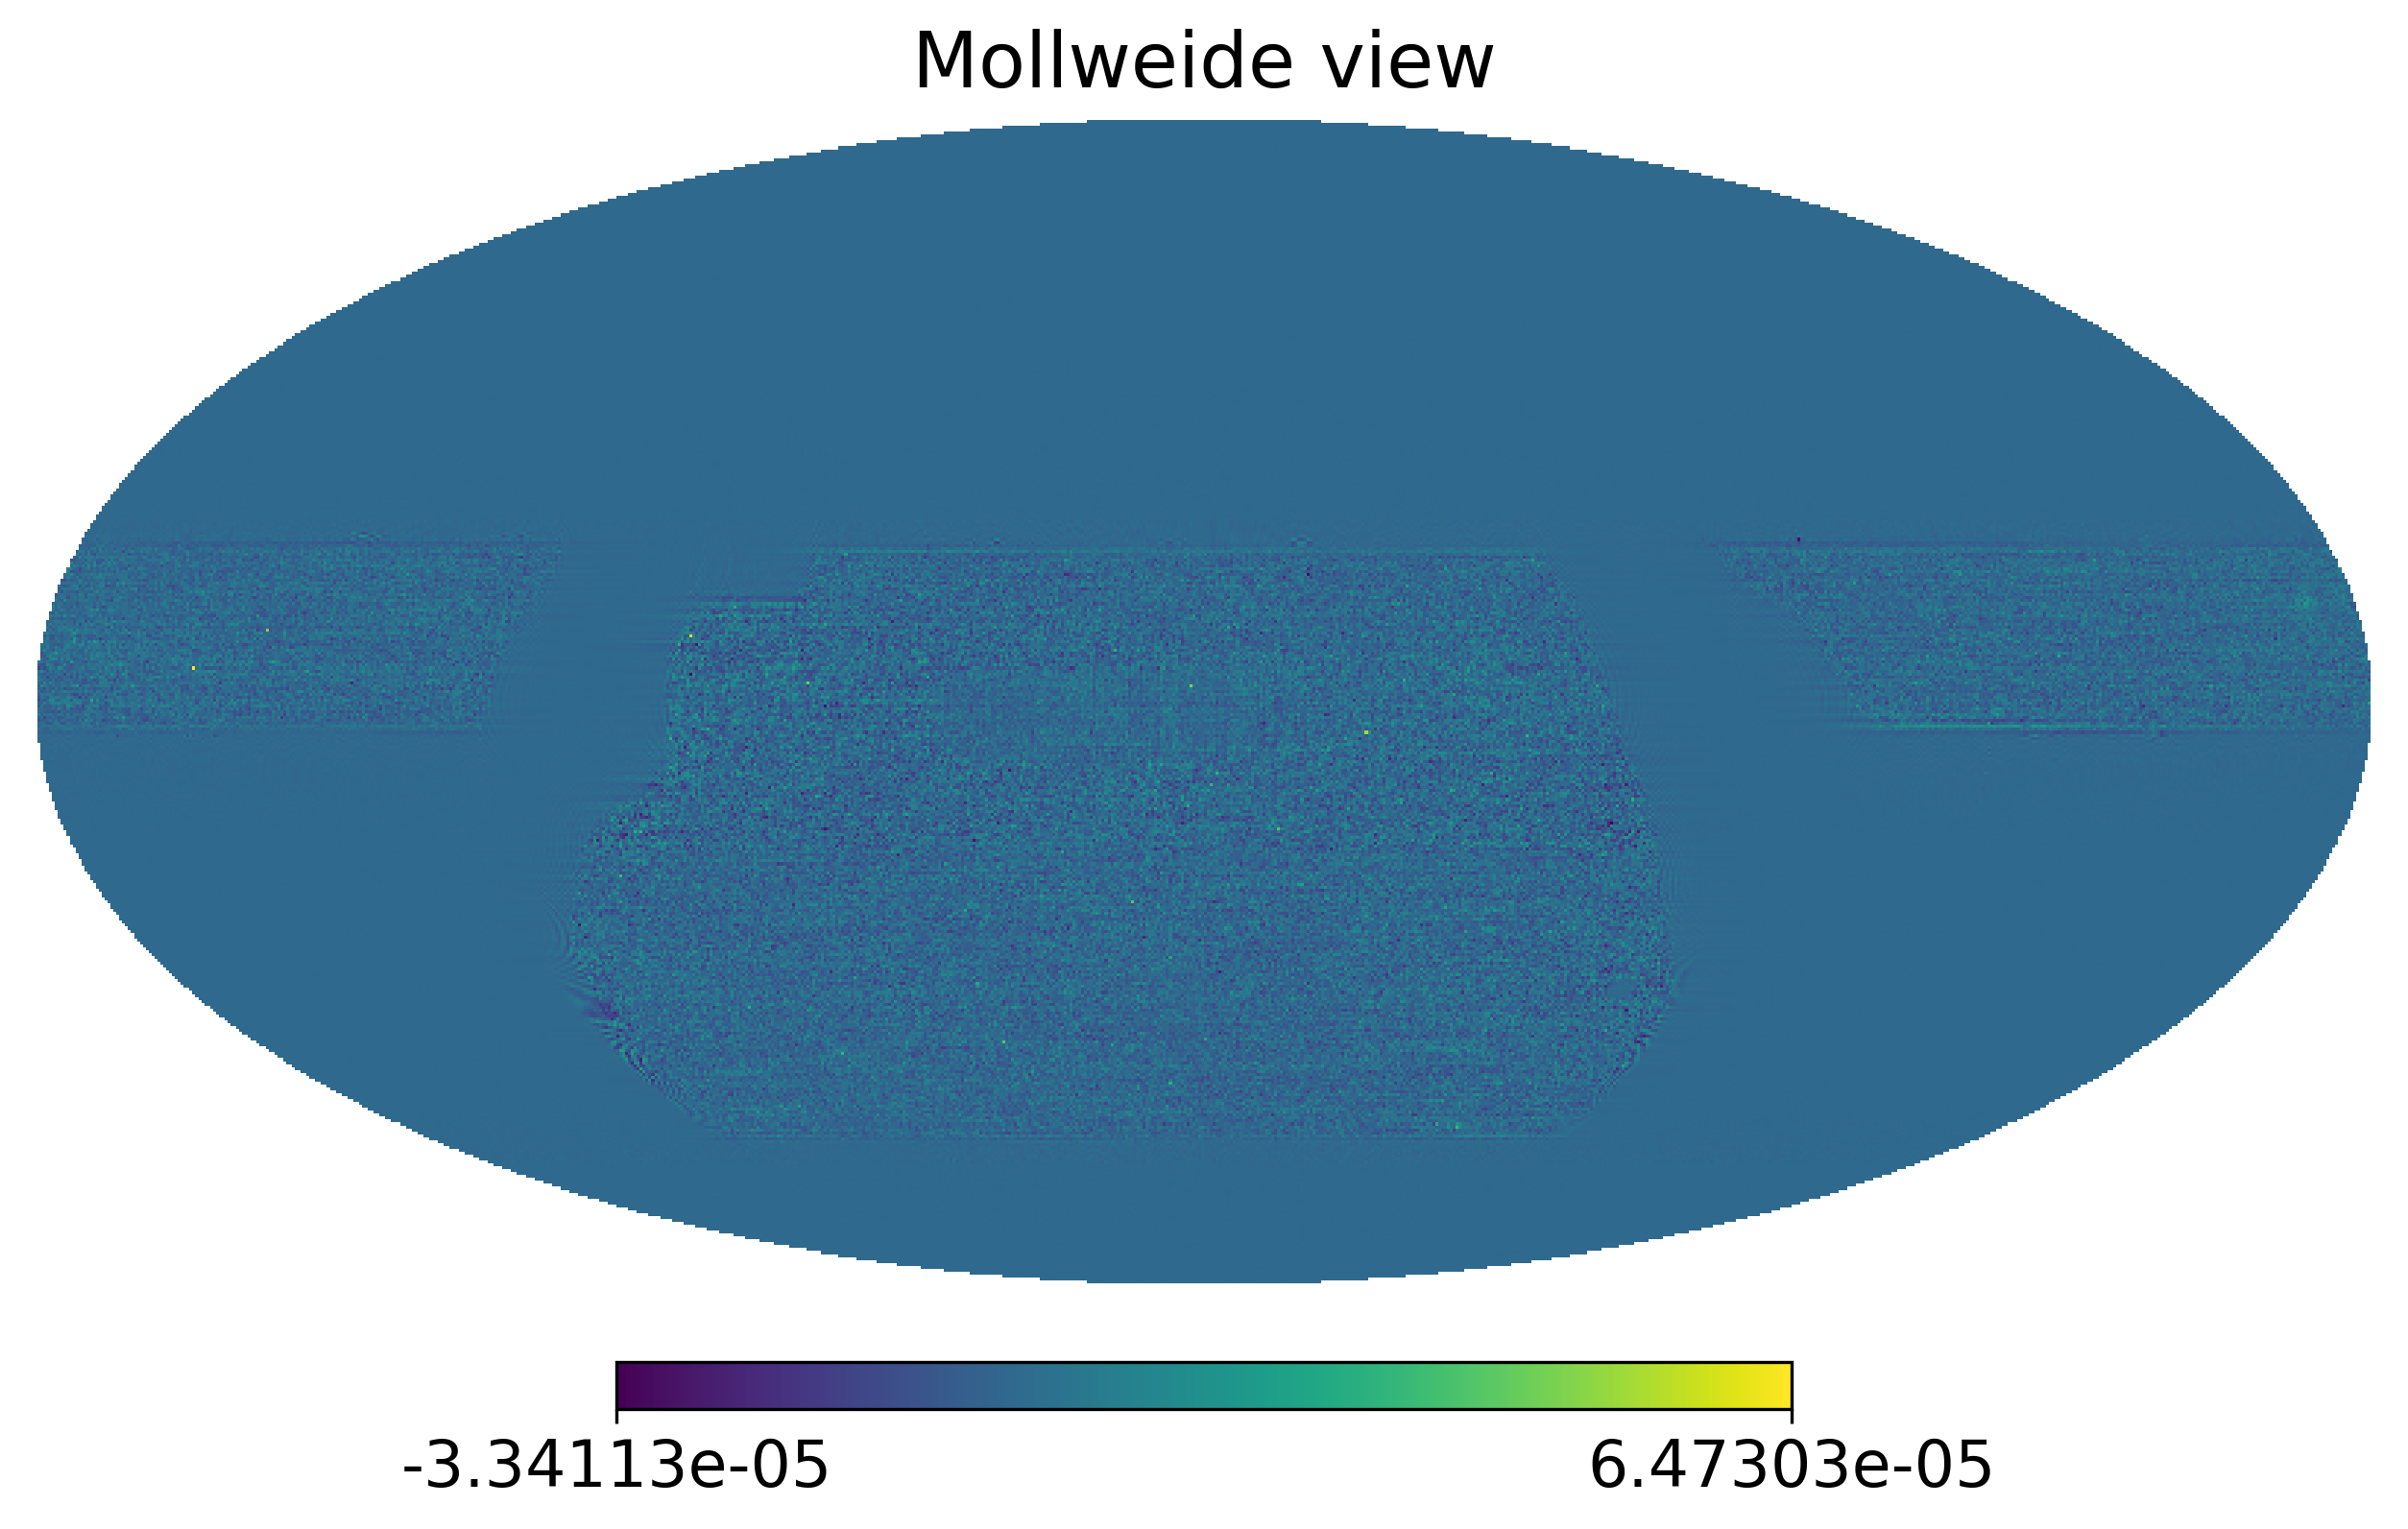

In [13]:
full_ymap = hp.read_map("/mnt/raid-cita/mlokken/data/act_ymaps/ilc_SZ_yy_4096_hpx.fits")
hp.mollview(full_ymap)

# Load in full DES data

In [16]:
ra, dec = desclustrs['RA'], desclustrs['dec']
ra_u = coord.Angle(ra*u.degree)
ra_u = ra_u.wrap_at(180*u.degree)
dec_u = coord.Angle(dec*u.degree)
# take random subset for plotting
rand = np.random.choice(np.arange(len(ra)), size=10000, replace=False)
ra_sub, dec_sub = ra_u.value[rand], dec_u.value[rand]

In [17]:
min(dec)

-57.0616950161079

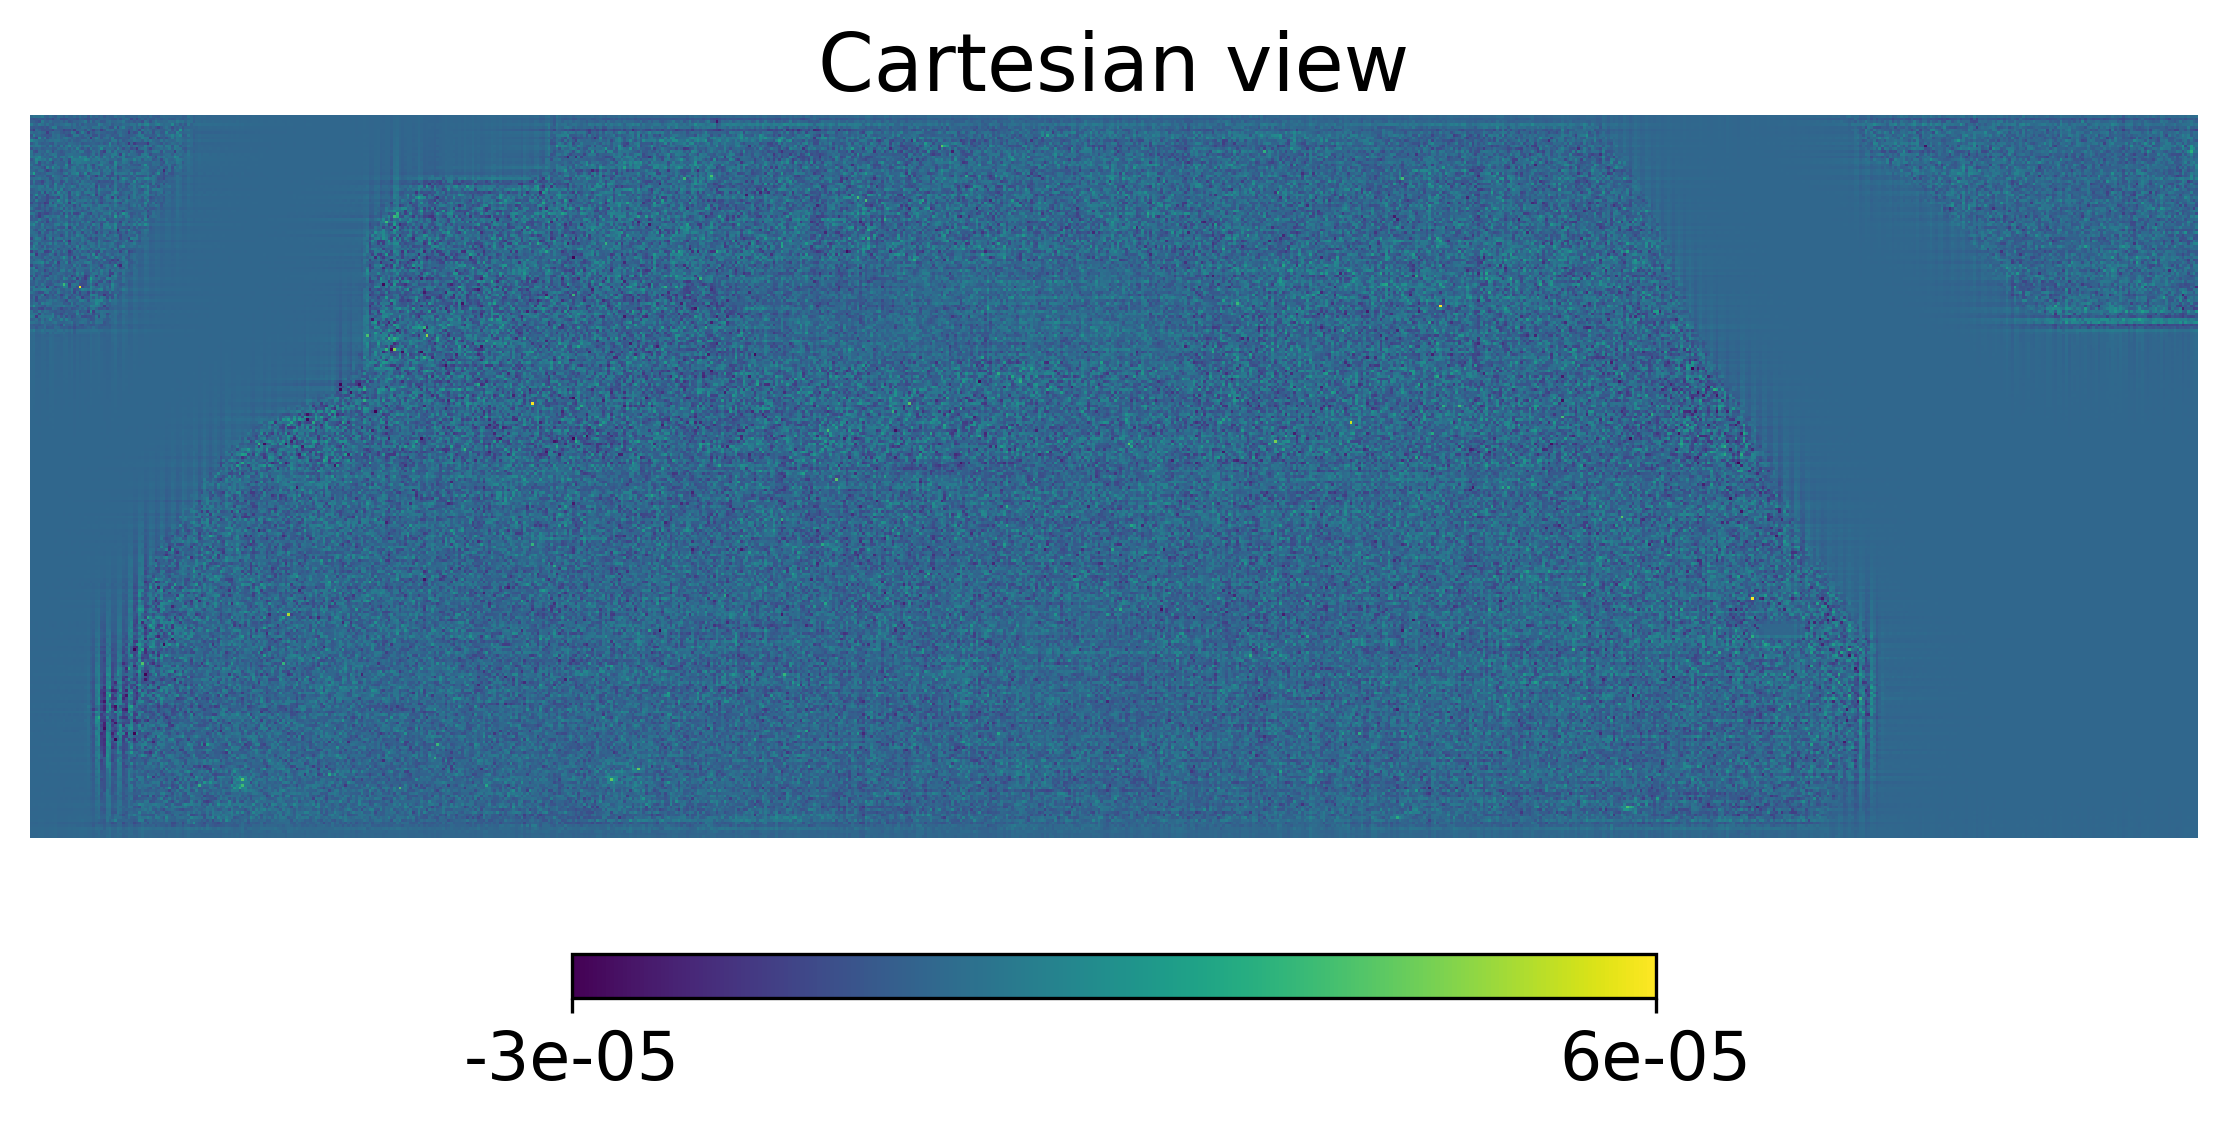

In [54]:
lonmin=-120
lonmax=120
latmin=-60
latmax=20
full_ymap_flat = hp.cartview(full_ymap, lonra=[lonmin, lonmax], latra=[latmin,latmax], max=6e-5, min=-3e-5, return_projected_map=True)

In [69]:
ymask_new = np.copy(full_ymask)
ymask_new[np.logical_not((full_ymask<.99)&(full_ymask>0.7))] = 0
# ymask_new[((full_ymask<1.0)&(full_ymask>0.9))] = 1

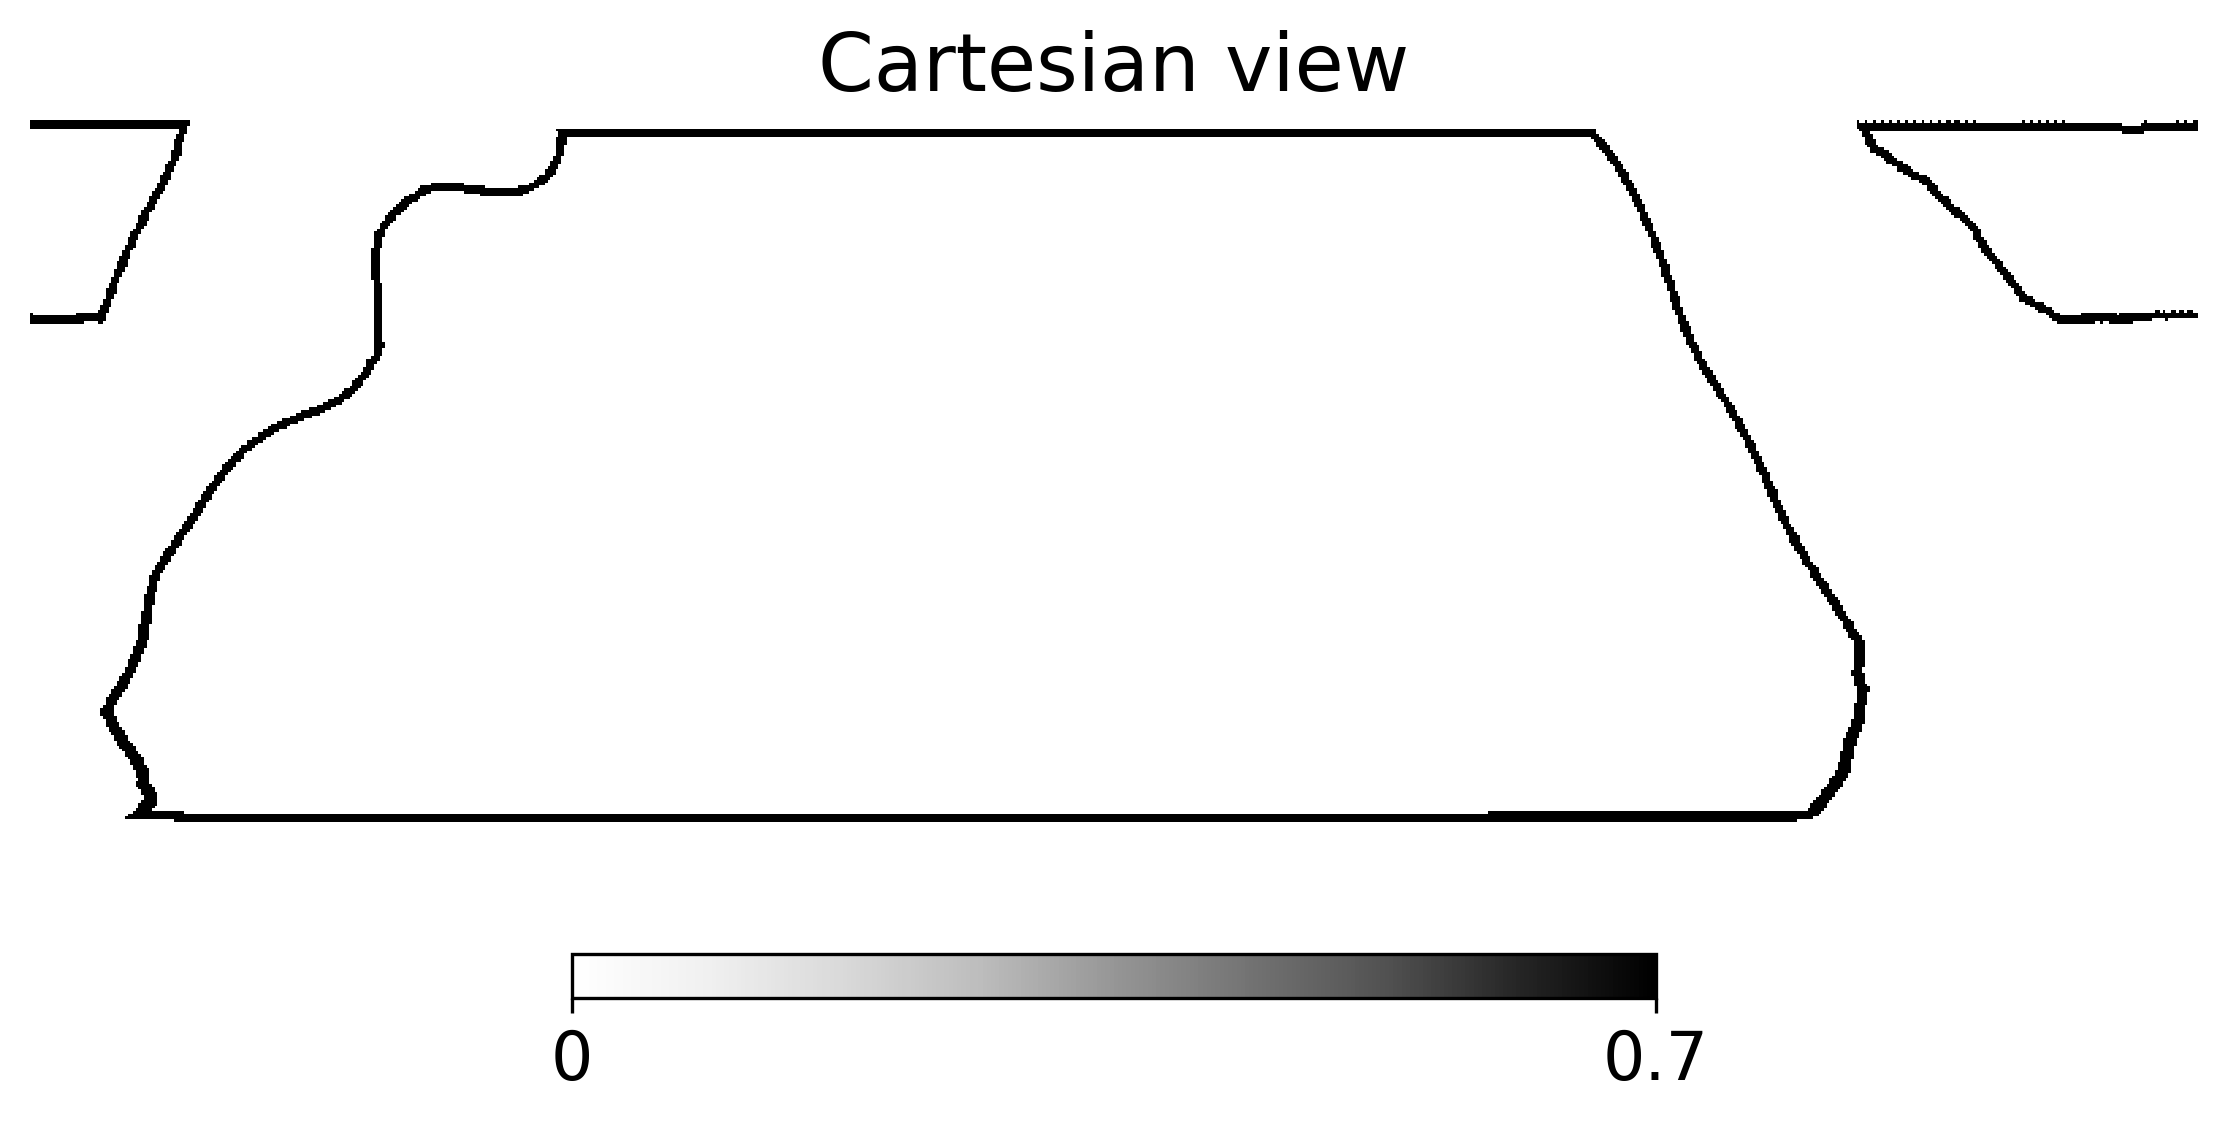

In [70]:
ymask_full_flat = hp.cartview(ymask_new, lonra=[lonmin, lonmax], latra=[latmin,latmax], return_projected_map=True, cmap='Greys', max=.7)

In [8]:
w = wcs.WCS(naxis=2)

height = float(full_ymap_flat.shape[0])
length = float(full_ymap_flat.shape[1])
w = wcs.WCS(naxis=2)
cdeltaX, crvalX = (lonmin-lonmax)/length, (lonmin+lonmax)/2.
cdeltaY, crvalY = (latmax-latmin)/height, (latmin+latmax)/2.

w.wcs.crpix = length/2., height/2.
print(w.wcs.crpix)
w.wcs.crval = [crvalX,crvalY]
print(w.wcs.crval)
w.wcs.cdelt = np.array([cdeltaX,cdeltaY])
print(w.wcs.cdelt)
w.wcs.ctype = ["RA", "DEC"]

[400. 160.]
[  0. -20.]
[-0.25  0.25]


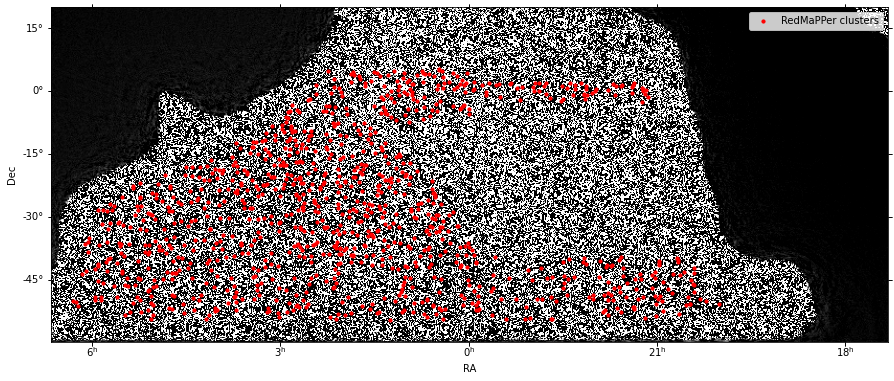

In [51]:
plt.figure(figsize=(15,10))
nrows = 1
ax1 = plt.subplot(nrows, 1, 1, projection=w)
ax1.imshow(full_ymap_flat, vmax=1e-6, vmin=0, cmap='gray')
# ax1.imshow(small_ymap_flat, cmap='YlOrBr')
plt.xlabel("RA")
ax1.set_ylabel("Dec")
Xpix,Ypix = w.all_world2pix(ra_u,dec_u,0)
choice = np.random.choice(np.arange(len(Xpix)), size=1000, replace=False)
ax1.scatter(Xpix[choice],Ypix[choice], c='red',s=10, label="RedMaPPer clusters")
plt.legend()

In [23]:
len(desclustrs)

722092

## Cardinal

In [3]:
cardinal = fits.open("/mnt/raid-cita/mlokken/cardinal/maglim_mask_Cardinal-3Y6a_v2.0_run_run_redmapper_v0.8.1_lgt20_vl50_catalog.fit")
cardcls = cardinal[1].data
cardhdr = cardinal[1].header
cardinal.close()

In [4]:
ra  = cardcls["RA"]
dec = cardcls["Dec"]
lam = cardcls["LAMBDA"]

rich_cond = lam>20
dec = dec[rich_cond]
ra  = ra[rich_cond]

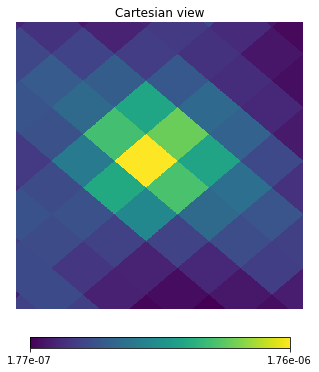

In [8]:
# show some clusters in buzzard y map
ymap = hp.read_map("/mnt/raid-cita/mlokken/buzzard/ymaps/ymap_buzzard_break_bbps_car_1p6arcmin_cutoff4_alphabreak0.398_4096_hpx.fits")
hp.cartview(ymap, lonra = [ra[0]-0.05, ra[0]+0.05], latra=[dec[0]-0.05, dec[0]+0.05])


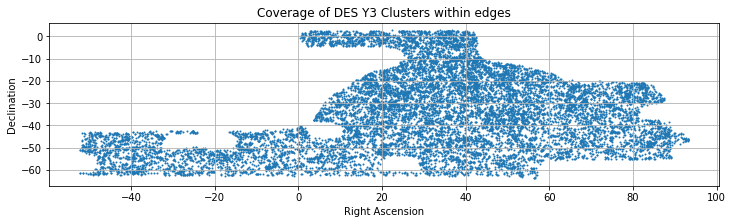

In [7]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 3
ra = coord.Angle(ra*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(dec*u.degree)
ax2 = plt.subplot()
ax2.scatter(ra, dec, s=1)

ax2.set_xlabel("Right Ascension")
ax2.set_ylabel("Declination")
ax2.set_title("Coverage of Cardinal Clusters within edges")
ax2.grid()


In [8]:
import h5py as h5
maglim = h5.File("/mnt/raid-cita/mlokken/cardinal/maglim_Cardinal-3_v2.0_Y6a.hdf5", 'r')
ra_gal = maglim["ra"][:]
dec_gal = maglim["dec"][:]
maglim.close()

In [9]:
idx = np.random.choice(np.arange(len(ra_gal)),size=2000)
ra_gal  = ra_gal[idx]
dec_gal = dec_gal[idx]
ra_gal = coord.Angle(ra_gal*u.degree)
ra_gal = ra_gal.wrap_at(180*u.degree)
dec_gal = coord.Angle(dec_gal*u.degree)


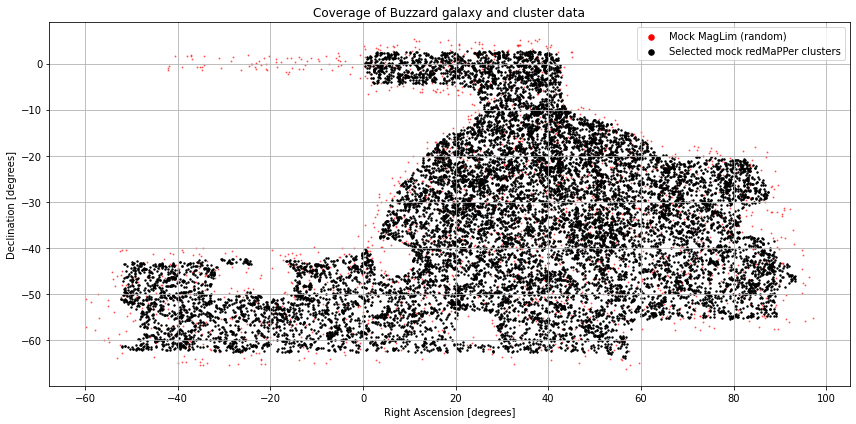

In [11]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 6

ax2 = plt.subplot()

ax2.scatter(ra_gal, dec_gal, s=1, color='r', alpha=0.5, label='Mock MagLim (random)')
ax2.scatter(ra, dec, s=2, color='k', label='Selected mock redMaPPer clusters')


ax2.set_xlabel("Right Ascension [degrees]")
ax2.set_ylabel("Declination [degrees]")
ax2.set_title("Coverage of Buzzard galaxy and cluster data")
ax2.grid()

leg = ax2.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [30]

plt.tight_layout()
# plt.savefig("/home/mlokken/actxdes_stacking/plots/buzz_gal_cl_data_map.png", dpi=300)

In [12]:
# looks good!